SUMMARY OF RESULTS

Temperature vs Latitude

It appears that Temperature vs Latitude does not a linear correlation when cities around the world of all latitudes are assessed. Despite a very weak linear correlation, it is clear from the scatterplot that there is some sort of correlation amongst the data. Interestingly, the temperature vs latitude linear correlation is evident for the hemispheres assessed separately. There is a positive linear correlation for the southern hemisphere and a strong negative correlation for the northern hemisphere.

Humidity vs Latitude

Overall, from the scatterplot analysis, it is evident that the majority of the cities around the world have humidities greater than 40%, with a larger proportion of cities densely populated around the 65 to 80% humidity range. However, Pearson's r-squared value for linear correlation on this relationship remains very weak as the humidities of cities still vary extensively in the higher ranges.

Cloudiness vs Latitude
There is weak correlation overall between Cloudiness vs Latitude. However, it is evident that the mode in  cloudiness % is high. For example, it is evident from the scatterplot that there are many cities which have specific cloudiness of 0%, 20%, 40%, ~78%, ~90% and 100%.

Wind Speed vs Latitude
The correlation between wind speed and latitude is very weak. However, there are distinct characteristics and patterns of windspeeds in general. A quick assessment of wind speed for cities would deduce that it is common (mode/s) for cities around the world to have low wind speeds of approximately 3, 4 or 5mph.




SCATTERPLOTS

First requirement: Create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude


Notes:
To generate a random float number between any two numbers, we can use random.uniform(start,stop)

In [1]:
#Dependencies
import requests 
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import numpy as np

In [2]:
#####TEST (PERTH CITY) to see json info, and define variables to extract for y-axis: Temperature(F), Latitude Humidity, Cloudiness, Windspeed, x-axis: Latitude####

#Request and get URL, and transform to JSON. 
#For units, use "imperial" as farenheit has been requested in project.
deg="\xb0" #degree sign
city="sydney"
units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
######Define variable "weather" and read the json file
weather=requests.get(url).json()
####Print the output of JSON formatted
#print(json.dumps(weather, indent=4, sort_keys=True))

####VARIABLES AND ITS VALUES FOR Y-AXIS###
#if set to imperial, units as follows
#Temp (F) 
print(weather["main"]["temp"], "Farenheit")
#Latitude Humidity
print(weather["main"]["humidity"], "% Humidity")
#Cloudiness (%)
print(weather["clouds"]["all"], "% Cloudiness")
#Windspeed (miles/hr)
print(weather["wind"]["speed"], "miles/hr")
# print("miles/hr")
####VARIABLES AND ITS VALUES FOR X-AXIS###
#latitude
print(weather["coord"]["lat"],deg,"latitude")
###OTHER VARIABLES####
#longitude
print(weather["coord"]["lon"],deg,"longitude")

75.2 Farenheit
69 % Humidity
0 % Cloudiness
12.66 miles/hr
-33.8679 ° latitude
151.2073 ° longitude


In [3]:
########JSON DATA #########
#base_url
base_url="http://api.openweathermap.org/data/2.5/weather?"

#######################

#Set up empty lists (for filling in in the for loop). Avoid using variables with same names as in API
 # Latitude, Longitude, Temperature(F), Latitude Humidity, Cloudiness, Windspeed
lat_list=[] #Latitude (°)
long_list=[] #Longitude (°)
city_list=[] #city name
temp_list=[] #Temperature(F)
lat_hum_list=[] #Latitude Humidity
cloud_list=[] #Cloudiness
winds_list=[] #windspeed


for x in range(500):

    #Random pick of latitude between -90 and 90 deg
    #Save latitudes into list "lat_list" 
    latitude=random.uniform(-90,90)
    lat_list.append(latitude)
    #Random pick of latitude between -180 and 180 deg
    #Save latitudes into list "lat_list" 
    longitude=random.uniform(-180,180)
    long_list.append(longitude)
    #Find the nearest city based on the random latitude and longitude variable
    city=citipy.nearest_city(latitude, longitude).city_name
    city_list.append(city)
    print(city)
    ####FOR THE CITY (in each loop), find variable values via JSON Data
    #Variable for query url. "imperial":farenheit, "metric":celcius, "":kelvin. 
    #Use "imperial" as farenheit has been requested in project.
    units="imperial"
    # print(city)
    #query url
    query_url=f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    ######Define variable "weather" and read the json file
    weather=requests.get(query_url).json()
    try:
        temperature=weather["main"]["temp"]
        print(f" Temperature: {temperature}") 
        temp_list.append(temperature)  
    except KeyError:
        print(f"Likely the temp, main did not work in the API site")
        temperature=np.nan
        temp_list.append(temperature)
        # tempearture=int(None)
        pass   

    #Find latitude humidity (%)
    try:
        lat_hum=weather["main"]["humidity"]
        print(f" Lat Humidity: {lat_hum}")
        lat_hum_list.append(lat_hum)
    except KeyError:
        print(f"Likely the lat_hum, main did not work in the API site")
        lat_hum=np.nan
        lat_hum_list.append(lat_hum)
        # lat_hum_list=int(None)
        pass

    #Cloudiness (%)
    try:
        cloud=weather["clouds"]["all"]
        print(f" Cloud %: {cloud}")
        cloud_list.append(cloud)
    except KeyError:
        print(f"Likely the clouds did not work in the API site")
        cloud=np.nan
        cloud_list.append(cloud)
        # cloud=int(None)
        pass

    #Windspeed (miles/hr)
    try:
        winds=weather["wind"]["speed"]
        print(f" Wind Speed: {winds}")
        winds_list.append(winds)
    except KeyError:
        print(f"Likely the winds did not work in the API site")
        winds=np.nan
        winds_list.append(cloud)
       

####PRINT THE FOLLOWING TO TEST #####
# print(lat_list)
# print(long_list)
# print(city_list)
# print(temp_list)
# print(lat_hum_list)
# print(cloud_list)
# print(winds_list)

ely the temp, main did not work in the API site
Likely the lat_hum, main did not work in the API site
Likely the clouds did not work in the API site
Likely the winds did not work in the API site
lagoa
 Temperature: 61.75
 Lat Humidity: 89
 Cloud %: 100
 Wind Speed: 23.69
grand river south east
Likely the temp, main did not work in the API site
Likely the lat_hum, main did not work in the API site
Likely the clouds did not work in the API site
Likely the winds did not work in the API site
ahuimanu
 Temperature: 72.97
 Lat Humidity: 73
 Cloud %: 40
 Wind Speed: 10.36
mudyuga
Likely the temp, main did not work in the API site
Likely the lat_hum, main did not work in the API site
Likely the clouds did not work in the API site
Likely the winds did not work in the API site
vaini
 Temperature: 71.6
 Lat Humidity: 100
 Cloud %: 75
 Wind Speed: 2.3
wewak
 Temperature: 80.38
 Lat Humidity: 79
 Cloud %: 100
 Wind Speed: 5.28
kaitangata
 Temperature: 55
 Lat Humidity: 76
 Cloud %: 28
 Wind Speed: 

In [4]:
#Create a dataframe from the lists created 
weather_dict={
    "City Name":city_list, 
    "Latitude":lat_list, 
    "Longitude":long_list,
    "Temperature": temp_list,
    "Latitude Humidity": lat_hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": winds_list
    }

weather_data = pd.DataFrame(weather_dict)
#Drop rows where there is missing data "NaN" 
weather1_data = weather_data.dropna()
weather_data
weather1_data

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
1,hithadhoo,-20.841587,85.603908,82.76,68.0,77.0,3.94
2,sao filipe,13.293488,-34.982080,75.88,60.0,0.0,6.08
4,bluff,-71.214122,172.363302,57.00,84.0,64.0,18.01
5,saint-philippe,-48.409808,62.306578,75.02,65.0,47.0,4.61
6,norman wells,68.737352,-120.152631,-13.00,77.0,90.0,3.51
...,...,...,...,...,...,...,...
495,ous,61.793925,61.297353,-17.07,88.0,100.0,6.85
496,qasigiannguit,66.282569,-48.212406,19.40,42.0,75.0,9.22
497,provideniya,62.015523,-174.457364,4.93,84.0,2.0,4.25
498,nanortalik,52.630018,-35.201380,22.64,89.0,0.0,11.48


Scatter plots of 500 cities

Temperature (F) vs. Latitude

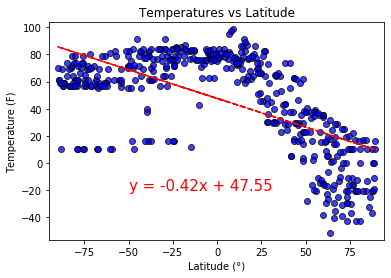

The r-squared value is: 0.41


In [5]:
###Create scatter plot of Temperature(F) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(-50,-20),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Temperatures vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")


Humidity (%) vs. Latitude

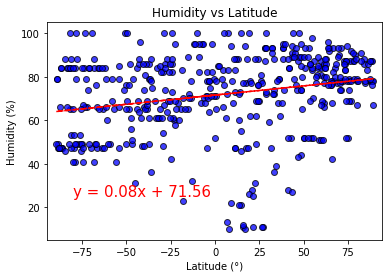

The r-squared value is: 0.06


In [6]:
###Create scatter plot of Humidity (%) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Latitude Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(-80,25),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Cloudiness (%) vs. Latitude


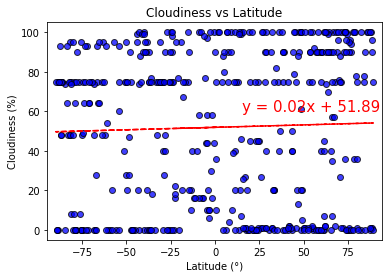

The r-squared value is: 0.00


In [7]:
###Create scatter plot of Cloudiness (%) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Wind Speed (mph) vs. Latitude

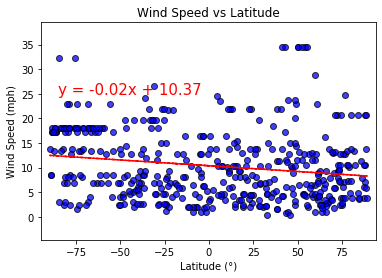

The r-squared value is: 0.03


In [8]:
###Create scatter plot of Wind Speed (miles/hr) vs Latitude(°)

#Use dataframe from previous cell: weather1_data
weather1_data

# Add the linear regression equation and line to plot
x_values = weather1_data["Latitude"]
y_values = weather1_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(-85,25),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")
plt.show()
#Pearson's R Value
print(f"The r-squared value is: {rvalue**2:.2f}")

Second requirement: Run a linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

Northern Hemisphere - Temperature (F) vs. Latitude

Southern Hemisphere - Temperature (F) vs. Latitude 

Northern Hemisphere - Humidity (%) vs. Latitude

Southern Hemisphere - Humidity (%) vs. Latitude

Northern Hemisphere - Cloudiness (%) vs. Latitude

Southern Hemisphere - Cloudiness (%) vs. Latitude

Northern Hemisphere - Wind Speed (mph) vs. Latitude

Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [9]:
#Create dataframe from main dataframe "weather_data" and filter for only northern hemisphere city data (Latitude>0°)
north_df=weather1_data[weather1_data["Latitude"]>=0]
north_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
2,sao filipe,13.293488,-34.982080,75.88,60.0,0.0,6.08
6,norman wells,68.737352,-120.152631,-13.00,77.0,90.0,3.51
8,tutoia,4.059707,-41.137394,84.20,79.0,75.0,13.80
10,dali,25.906361,99.639100,45.86,78.0,1.0,6.38
18,pevek,84.026500,172.778125,-20.63,88.0,78.0,4.76
...,...,...,...,...,...,...,...
495,ous,61.793925,61.297353,-17.07,88.0,100.0,6.85
496,qasigiannguit,66.282569,-48.212406,19.40,42.0,75.0,9.22
497,provideniya,62.015523,-174.457364,4.93,84.0,2.0,4.25
498,nanortalik,52.630018,-35.201380,22.64,89.0,0.0,11.48


In [10]:
#Create dataframe from main dataframe "weather_data" and filter for only southern hemisphere city data (Latitude<0°)
south_df=weather1_data[weather1_data["Latitude"]<0]
south_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
1,hithadhoo,-20.841587,85.603908,82.76,68.0,77.0,3.94
4,bluff,-71.214122,172.363302,57.00,84.0,64.0,18.01
5,saint-philippe,-48.409808,62.306578,75.02,65.0,47.0,4.61
7,victoria,-4.478568,56.274633,62.56,82.0,58.0,1.01
9,karratha,-23.227535,116.301594,85.21,60.0,0.0,21.77
...,...,...,...,...,...,...,...
488,souillac,-51.565186,73.401185,82.40,74.0,40.0,6.91
490,mataura,-63.756874,-141.677269,57.00,84.0,48.0,18.01
491,albany,-79.106508,94.550686,10.26,49.0,0.0,18.01
492,puerto ayora,-1.564930,-103.771083,75.99,95.0,16.0,1.99


Northern Hemisphere - Temperature (F) vs. Latitude 

Southern Hemisphere - Temperature (F) vs. Latitude 

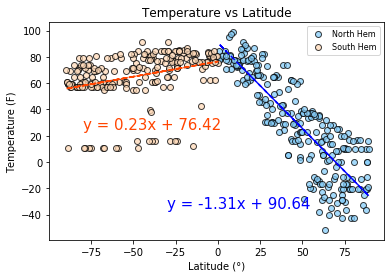

Northern Hemisphere: The r-squared value is: 0.74
Southern Hemisphere: The r-squared value is: 0.10


In [11]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Temperature (F) vs Latitude(°)

#Use dataframe from previous cell: north_df
north_df 
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Temperature"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Temperature"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="peachpuff", edgecolors="black", alpha=0.75,label="South Hem"); #south hem

# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orangered") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(-30,-35),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-80,25),fontsize=15,color="orangered") #south hem

#Label title, x-axis and y-axis
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")

#Plot legend
plt.legend(loc='upper right',fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

Northern Hemisphere - Humidity (%) vs. Latitude

Southern Hemisphere - Humidity (%) vs. Latitude

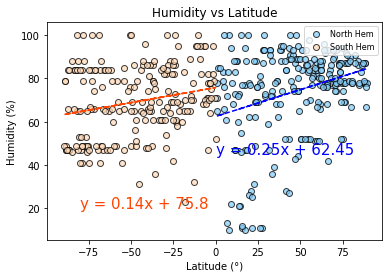

Northern Hemisphere: The r-squared value is: 0.09
Southern Hemisphere: The r-squared value is: 0.05


In [12]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Humidity (%) vs Latitude(°)

#Use dataframe from previous cell: north_df
north_df
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Latitude Humidity"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Latitude Humidity"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="peachpuff", edgecolors="black", alpha=0.75,label="South Hem"); #south hem

# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orangered") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(0,45),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-80,20),fontsize=15,color="orangered") #south hem

#Label title, x-axis and y-axis
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

Northern Hemisphere - Cloudiness (%) vs. Latitude

Southern Hemisphere - Cloudiness (%) vs. Latitude

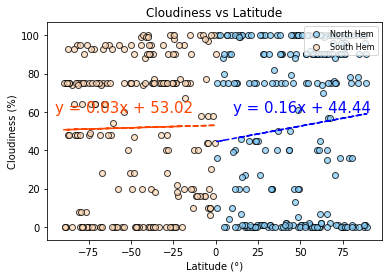

Northern Hemisphere: The r-squared value is: 0.01
Southern Hemisphere: The r-squared value is: 0.00


In [13]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Cloudiness (%) vs Latitude(°)

#Use dataframe from previous cell: north_df, south_df
north_df
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Cloudiness"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Cloudiness"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="peachpuff", edgecolors="black", alpha=0.75,label="South Hem"); #south hem

# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orangered") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(10,60),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-95,60),fontsize=15,color="orangered") #south hem

#Label title, x-axis and y-axis
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

Northern Hemisphere - Wind Speed (mph) vs. Latitude

Southern Hemisphere - Wind Speed (mph) vs. Latitude

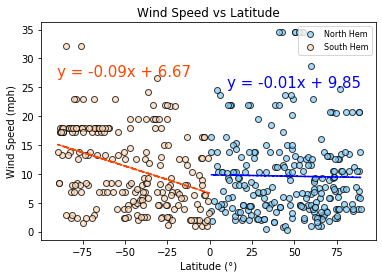

Northern Hemisphere: The r-squared value is: 0.00
Southern Hemisphere: The r-squared value is: 0.14


In [14]:
# Northern Hemisphere: north_df
# South Hemisphere: south_df

###Create scatter plot of Wind Speed (mph) vs Latitude(°)

#Use dataframe from previous cell: north_df, south_df
north_df
south_df

# Add the linear regression equation and line to plot
x1_values = north_df["Latitude"] #north hem
y1_values = north_df["Wind Speed"] #north hem
x2_values = south_df["Latitude"] #south hem
y2_values = south_df["Wind Speed"] #south hem
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1_values, y1_values) #north hem
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x2_values, y2_values) #south hem
regress_values1 = x1_values * slope1 + intercept1 #north hem
regress_values2 = x2_values * slope2 + intercept2 #south hem
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) #north hem
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) #south hem
#Make a scatter plot
n_graph=plt.scatter(x1_values, y1_values, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75,label="North Hem"); #north hem
s_graph=plt.scatter(x2_values, y2_values, marker="o", facecolors="peachpuff", edgecolors="black", alpha=0.75,label="South Hem"); #south hem

# #Plot linear regression model
plt.plot(x1_values,regress_values1,"--",color="blue") #north hem
plt.plot(x2_values,regress_values2,"--",color="orangered") #south hem
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq1,(10,25),fontsize=15,color="blue") #north hem
plt.annotate(line_eq2,(-90,27),fontsize=15,color="orangered") #south hem

#Label title, x-axis and y-axis
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

#Plot legend
plt.legend(loc="upper right",fontsize=8)

#Show plot
plt.show()

#Pearson's R Value
print(f"Northern Hemisphere: The r-squared value is: {rvalue1**2:.2f}") #north hem
print(f"Southern Hemisphere: The r-squared value is: {rvalue2**2:.2f}") #south hem

In [15]:
store weather1_data

Stored 'weather1_data' (DataFrame)
